# Quantum Mechanics Simulator - Testing

Class Hierarchy:
* `Operator`: Define an operation, comes with preset operations
* `State`

### The Quantum Harmonic Oscillator
Hamiltonian
![Logo](https://wikimedia.org/api/rest_v1/media/math/render/svg/0b8b0c21e1de998f920a5d164d82af426bbd99c5)
and exact Eigenenergies
![Logo](https://wikimedia.org/api/rest_v1/media/math/render/svg/ab89cf43fbca42581b3828be5e27315468c9689f)
Setting `hbar=omega=m=1`

Time to plot Ground State: 0.043990135192871094

DEBUG: ('Making matrix: ', (101, 101))
DEBUG: ('Basis States Made',)
DEBUG: ('Matrix is ', (101, 101))
Time to calculate Energy Eigenvals with 101 basis states: 4.109724760055542

DEBUG: ('Making matrix: ', (201, 201))
DEBUG: ('Basis States Made',)
DEBUG: ('Matrix is ', (201, 201))
Time to calculate Energy Eigenvals with 201 basis states: 18.266712188720703

DEBUG: ('Making matrix: ', (501, 501))
DEBUG: ('Basis States Made',)
DEBUG: ('Matrix is ', (501, 501))
Time to calculate Energy Eigenvals with 501 basis states: 122.24615693092346



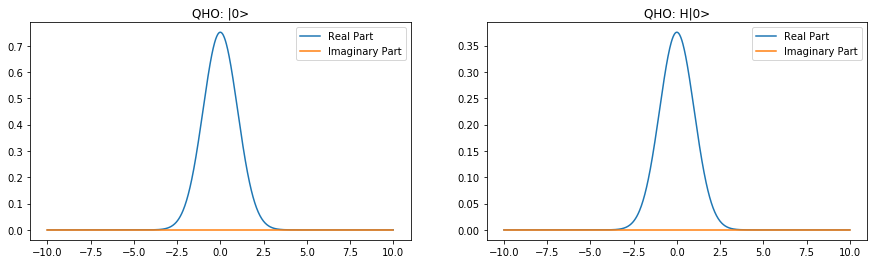

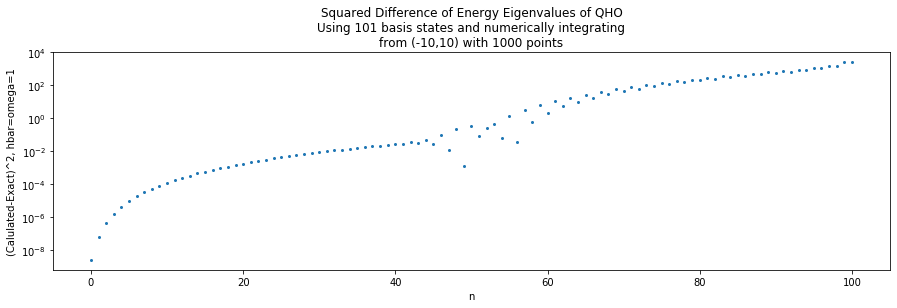

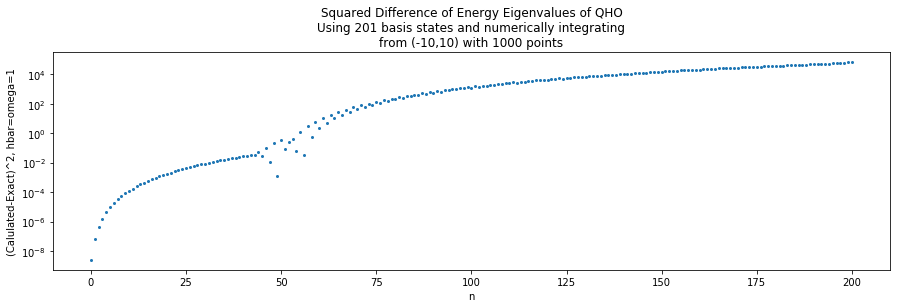

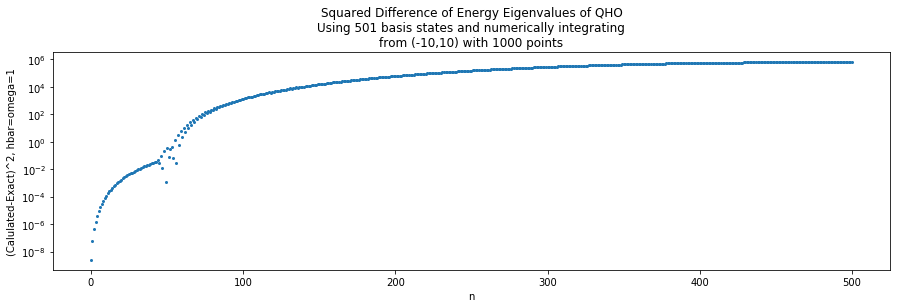

In [1]:
from QuantumClasses import *
from time import time

m=1
omega=1
harmOscHamil = (1/2/m)*Operator.Momentum()**2 + (m*omega**2 /2)*Operator.Position()**2
harmOscHamil.verbose = True

HOGroundState = State( lambda x : np.exp(-x**2 *m*omega/2/Operator.hbar), np.linspace(-10,10,1000) ).norm()

t = time()
# print("Ground State Energy:", np.real(HOGroundState*( harmOscHamil*HOGroundState ) ))
plt.figure(1,figsize=(15,4))
plt.subplot(121)
plt.title('QHO: |0>')
( HOGroundState ).plot()
plt.subplot(122)
plt.title('QHO: H|0>')
( harmOscHamil*HOGroundState ).plot()
print('Time to plot Ground State:', time()-t)
print()

t=time()
plt.figure(2,figsize=(15,4))
N=50
num_x_points = 1000
calc_eigenvals = np.sort(np.real( harmOscHamil.find_eig( np.linspace(-10,10,num_x_points),N=N )[0] ))
exact_eigenvals = Operator.hbar*omega*( np.arange(0,2*N+1,1) + 0.5 )
plt.plot( (calc_eigenvals-exact_eigenvals)**2,'o',ms=2)
plt.title('Squared Difference of Energy Eigenvalues of QHO\nUsing ' + str(2*N+1) + ' basis states and numerically integrating\nfrom (-10,10) with '+str(num_x_points)+' points')
plt.ylabel( '(Calulated-Exact)^2, hbar=omega=1' )
plt.xlabel( 'n' )
plt.yscale( 'log' )
print('Time to calculate Energy Eigenvals with '+str(2*N+1)+' basis states:', time()-t)
print()

t=time()
plt.figure(3,figsize=(15,4))
N=100
num_x_points = 1000
calc_eigenvals = np.sort(np.real( harmOscHamil.find_eig( np.linspace(-10,10,num_x_points),N=N )[0] ))
exact_eigenvals = Operator.hbar*omega*( np.arange(0,2*N+1,1) + 0.5 )
plt.plot( (calc_eigenvals-exact_eigenvals)**2,'o',ms=2)
plt.title('Squared Difference of Energy Eigenvalues of QHO\nUsing ' + str(2*N+1) + ' basis states and numerically integrating\nfrom (-10,10) with '+str(num_x_points)+' points')
plt.ylabel( '(Calulated-Exact)^2, hbar=omega=1' )
plt.xlabel( 'n' )
plt.yscale( 'log' )
print('Time to calculate Energy Eigenvals with '+str(2*N+1)+' basis states:', time()-t)
print()

t=time()
plt.figure(4,figsize=(15,4))
N=250
num_x_points = 1000
calc_eigenvals = np.sort(np.real( harmOscHamil.find_eig( np.linspace(-10,10,num_x_points),N=N )[0] ))
exact_eigenvals = Operator.hbar*omega*( np.arange(0,2*N+1,1) + 0.5 )
plt.plot( (calc_eigenvals-exact_eigenvals)**2,'o',ms=2)
plt.title('Squared Difference of Energy Eigenvalues of QHO\nUsing ' + str(2*N+1) + ' basis states and numerically integrating\nfrom (-10,10) with '+str(num_x_points)+' points')
plt.ylabel( '(Calulated-Exact)^2, hbar=omega=1' )
plt.xlabel( 'n' )
plt.yscale( 'log' )
print('Time to calculate Energy Eigenvals with '+str(2*N+1)+' basis states:', time()-t)
print()

Above I studied how including more basis states (as the number in reality is infinite) affects the squared error from the exact result. You can see that simply adding more basis states to use for the calculation of eigenvalues does not change the error. I suspect that this error may simply be a numerical precision error - limited by the number of bits the computer can use to store numbers. Also, vectorizing calculation of the matrix via `numpy.outer` makes it much faster than brute forcing it (which is to be expected).

DEBUG: ('Making matrix: ', (101, 101))
DEBUG: ('Basis States Made',)
DEBUG: ('Matrix is ', (101, 101))
Time to calculate Energy Eigenvals with 101 basis states: 4.324613332748413

Time to calculate Energy Eigenvals with 101 basis states: 0.01899576187133789

Time to calculate Energy Eigenvals with 101 basis states: 0.021991729736328125



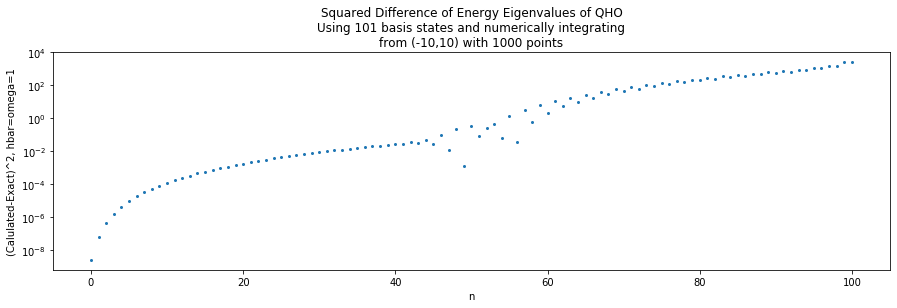

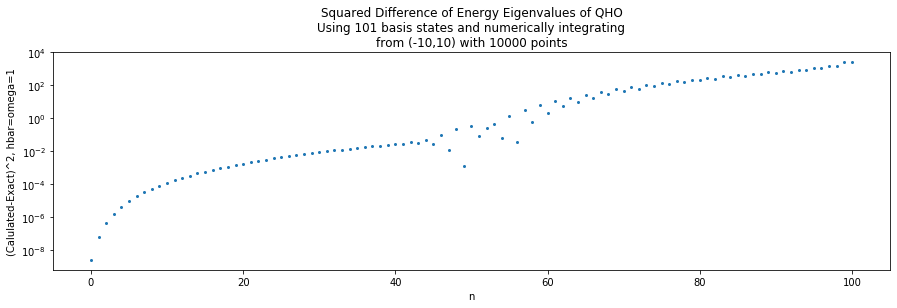

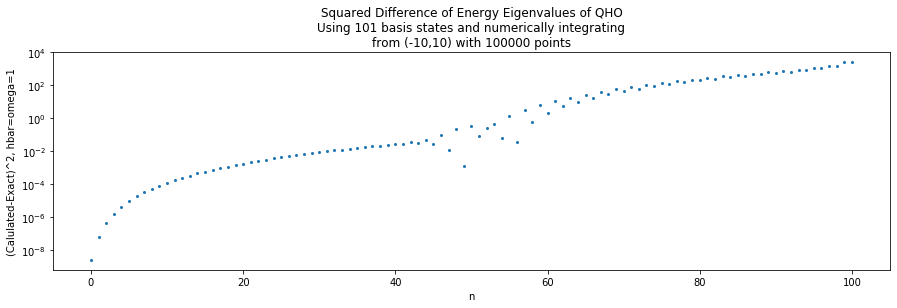

In [2]:
from time import time

m=1
omega=1
harmOscHamil = (1/2/m)*Operator.Momentum()**2 + (m*omega**2 /2)*Operator.Position()**2
harmOscHamil.verbose = True

t=time()
plt.figure(2,figsize=(15,4))
N=50
num_x_points = 1000
calc_eigenvals = np.sort(np.real( harmOscHamil.find_eig( np.linspace(-10,10,num_x_points),N=N )[0] ))
exact_eigenvals = Operator.hbar*omega*( np.arange(0,2*N+1,1) + 0.5 )
plt.plot( (calc_eigenvals-exact_eigenvals)**2,'o',ms=2)
plt.title('Squared Difference of Energy Eigenvalues of QHO\nUsing ' + str(2*N+1) + ' basis states and numerically integrating\nfrom (-10,10) with '+str(num_x_points)+' points')
plt.ylabel( '(Calulated-Exact)^2, hbar=omega=1' )
plt.xlabel( 'n' )
plt.yscale( 'log' )
print('Time to calculate Energy Eigenvals with '+str(2*N+1)+' basis states:', time()-t)
print()

t=time()
plt.figure(3,figsize=(15,4))
N=50
num_x_points = 10000
calc_eigenvals = np.sort(np.real( harmOscHamil.find_eig( np.linspace(-10,10,num_x_points),N=N )[0] ))
exact_eigenvals = Operator.hbar*omega*( np.arange(0,2*N+1,1) + 0.5 )
plt.plot( (calc_eigenvals-exact_eigenvals)**2,'o',ms=2)
plt.title('Squared Difference of Energy Eigenvalues of QHO\nUsing ' + str(2*N+1) + ' basis states and numerically integrating\nfrom (-10,10) with '+str(num_x_points)+' points')
plt.ylabel( '(Calulated-Exact)^2, hbar=omega=1' )
plt.xlabel( 'n' )
plt.yscale( 'log' )
print('Time to calculate Energy Eigenvals with '+str(2*N+1)+' basis states:', time()-t)
print()

t=time()
plt.figure(4,figsize=(15,4))
N=50
num_x_points = 100000
calc_eigenvals = np.sort(np.real( harmOscHamil.find_eig( np.linspace(-10,10,num_x_points),N=N )[0] ))
exact_eigenvals = Operator.hbar*omega*( np.arange(0,2*N+1,1) + 0.5 )
plt.plot( (calc_eigenvals-exact_eigenvals)**2,'o',ms=2)
plt.title('Squared Difference of Energy Eigenvalues of QHO\nUsing ' + str(2*N+1) + ' basis states and numerically integrating\nfrom (-10,10) with '+str(num_x_points)+' points')
plt.ylabel( '(Calulated-Exact)^2, hbar=omega=1' )
plt.xlabel( 'n' )
plt.yscale( 'log' )
print('Time to calculate Energy Eigenvals with '+str(2*N+1)+' basis states:', time()-t)
print()

DEBUG: ('Making matrix: ', (101, 101))
DEBUG: ('Basis States Made',)
DEBUG: ('Matrix is ', (101, 101))
Time to calculate Energy Eigenvals with 101 basis states: 4.692662000656128

Time to calculate Energy Eigenvals with 101 basis states: 0.021001100540161133

Time to calculate Energy Eigenvals with 101 basis states: 0.018813610076904297



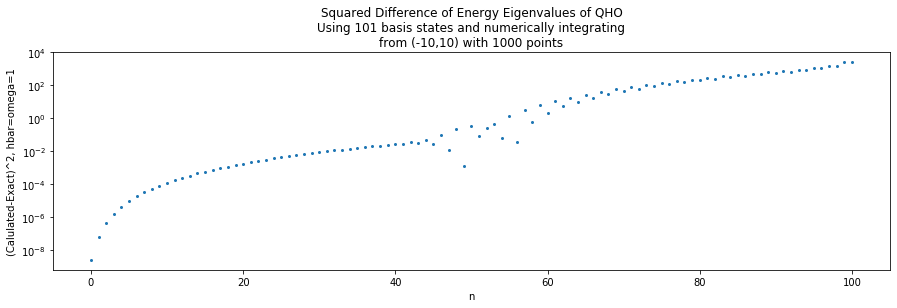

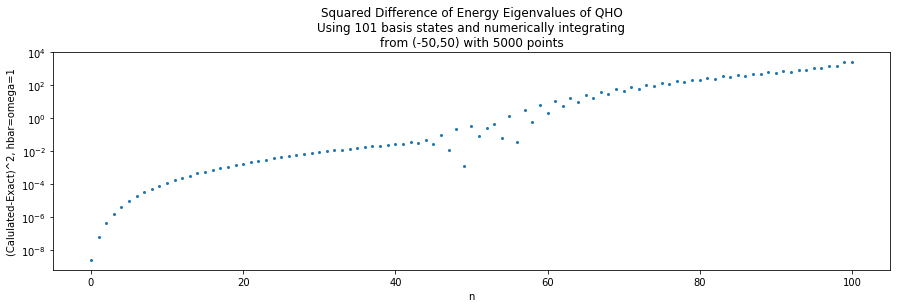

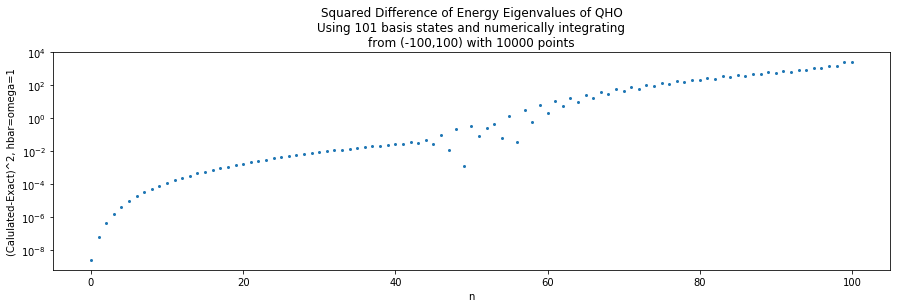

In [3]:
from time import time

m=1
omega=1
harmOscHamil = (1/2/m)*Operator.Momentum()**2 + (m*omega**2 /2)*Operator.Position()**2
harmOscHamil.verbose = True

t=time()
plt.figure(2,figsize=(15,4))
N=50
num_x_points = 1000
calc_eigenvals = np.sort(np.real( harmOscHamil.find_eig( np.linspace(-10,10,num_x_points),N=N )[0] ))
exact_eigenvals = Operator.hbar*omega*( np.arange(0,2*N+1,1) + 0.5 )
plt.plot( (calc_eigenvals-exact_eigenvals)**2,'o',ms=2)
plt.title('Squared Difference of Energy Eigenvalues of QHO\nUsing ' + str(2*N+1) + ' basis states and numerically integrating\nfrom (-10,10) with '+str(num_x_points)+' points')
plt.ylabel( '(Calulated-Exact)^2, hbar=omega=1' )
plt.xlabel( 'n' )
plt.yscale( 'log' )
print('Time to calculate Energy Eigenvals with '+str(2*N+1)+' basis states:', time()-t)
print()

t=time()
plt.figure(3,figsize=(15,4))
N=50
num_x_points = 5000
calc_eigenvals = np.sort(np.real( harmOscHamil.find_eig( np.linspace(-50,50,num_x_points),N=N )[0] ))
exact_eigenvals = Operator.hbar*omega*( np.arange(0,2*N+1,1) + 0.5 )
plt.plot( (calc_eigenvals-exact_eigenvals)**2,'o',ms=2)
plt.title('Squared Difference of Energy Eigenvalues of QHO\nUsing ' + str(2*N+1) + ' basis states and numerically integrating\nfrom (-50,50) with '+str(num_x_points)+' points')
plt.ylabel( '(Calulated-Exact)^2, hbar=omega=1' )
plt.xlabel( 'n' )
plt.yscale( 'log' )
print('Time to calculate Energy Eigenvals with '+str(2*N+1)+' basis states:', time()-t)
print()

t=time()
plt.figure(4,figsize=(15,4))
N=50
num_x_points = 10000
calc_eigenvals = np.sort(np.real( harmOscHamil.find_eig( np.linspace(-100,100,num_x_points),N=N )[0] ))
exact_eigenvals = Operator.hbar*omega*( np.arange(0,2*N+1,1) + 0.5 )
plt.plot( (calc_eigenvals-exact_eigenvals)**2,'o',ms=2)
plt.title('Squared Difference of Energy Eigenvalues of QHO\nUsing ' + str(2*N+1) + ' basis states and numerically integrating\nfrom (-100,100) with '+str(num_x_points)+' points')
plt.ylabel( '(Calulated-Exact)^2, hbar=omega=1' )
plt.xlabel( 'n' )
plt.yscale( 'log' )
print('Time to calculate Energy Eigenvals with '+str(2*N+1)+' basis states:', time()-t)
print()

#### Conclusion about Eigenvalues
So changing the number of basis states, the number of points along the integration and the range of integration do not move or remove the "kink" in the graph of the error.

## Particle in a box
Doesn't seem to work, not entirely surprising though. Thinking about just doing the free particle hamiltonian with an operator that forces the wavefunction to go to zero at the ends of the box?

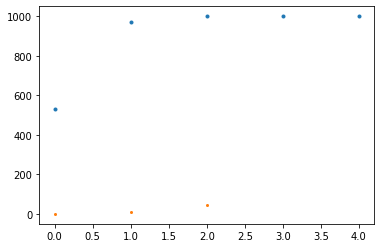

In [4]:
def potential(a_state):
    L = 1
    V0=1000
    V = V0*( np.array(a_state[0]>L/2,dtype=int)+np.array(a_state[0]<-L/2,dtype=int) )
    return State( lambda x : V*a_state.x_rep_func(x),a_state[1] )

# V = 
m=1
H = (1/2/m)*Operator.Momentum2() + Operator(potential)

N=2
num_x_points = 1000
L = 10
plt.plot( np.sort(np.real( H.find_eig( np.linspace(-L/2,L/2,num_x_points),N=N )[0] )),'o',ms=3 )
plt.plot( (np.linspace(0,3,3)*np.pi*Operator.hbar)**2 /2/m,'o',ms=2)

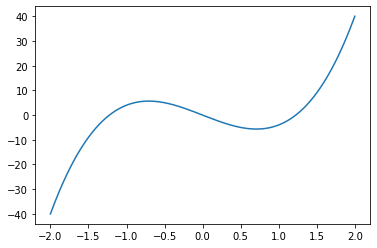

In [5]:
#random messing around with other complete sets of functions
from numpy.polynomial.hermite import Hermite
x,y=Hermite([0,0,0,1]).linspace(1000,(-2,2))
plt.plot(x,y)